## Bay Wheels Data 2019 Data Exploration and Visualization
by Markus Müller

### Table of Contents
1. [Introduction](#intro)
2. [Gather](#gather)
3. [Assess](#assess)
4. [Clean](#clean)
5. [Visualizations](#visual)
6. [Answers](#answers)
7. [Resources](#resources)

<a id='gather'></a>
### Introduction

The goal of this notebook is to create exploratory data visualizations that are going to be used to create a presentation with explanatory visualizations.

Wiki: Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013.(https://en.wikipedia.org/wiki/Bay_Wheels).

The dataset used for this analysis consists of monthly individual trip data from January 2019 to December 2019 and can can be downloaded individually per month from here: https://s3.amazonaws.com/baywheels-data/index.html 

The dataset is structured as follows (https://www.lyft.com/bikes/bay-wheels/system-data):
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

<a id='gather'></a>
### Gather

In [1]:
# imports
import pandas as pd
import numpy as np
import requests
import os
import zipfile
from io import BytesIO
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
folder_name = 'FordGoBike_2019'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3]:
# get the links to the data from 2019
path_url = 'https://s3.amazonaws.com/baywheels-data/'
links = [path_url+'201901-fordgobike-tripdata.csv.zip', path_url+'201902-fordgobike-tripdata.csv.zip',
        path_url+'201903-fordgobike-tripdata.csv.zip', path_url+'201904-fordgobike-tripdata.csv.zip',
        path_url+'201905-fordgobike-tripdata.csv.zip', path_url+'201906-fordgobike-tripdata.csv.zip',
        path_url+'201907-fordgobike-tripdata.csv.zip', path_url+'201908-fordgobike-tripdata.csv.zip',
        path_url+'201909-fordgobike-tripdata.csv.zip', path_url+'2019010-fordgobike-tripdata.csv.zip',
        path_url+'2019011-fordgobike-tripdata.csv.zip', path_url+'2019012-fordgobike-tripdata.csv.zip']

In [4]:
for url in links:
    r = requests.get(url)
    try:
        unzip = zipfile.ZipFile(BytesIO(r.content))
        unzip.extractall(folder_name)
    except Exception as e:
        print(str(e))

File is not a zip file
File is not a zip file
File is not a zip file
File is not a zip file
File is not a zip file
File is not a zip file
File is not a zip file
File is not a zip file


In [5]:
# lets check wich file were corretly unzipped
os.listdir(folder_name)
# we have the csvs for the firts four months of 2019

['201904-fordgobike-tripdata.csv',
 '201903-fordgobike-tripdata.csv',
 '__MACOSX',
 '201901-fordgobike-tripdata.csv',
 '201902-fordgobike-tripdata.csv']

In [10]:
# to get all the data i downloaded the rest manually
os.listdir(folder_name)
# I also tried to downloaded the zip files programmatically and unzip than manually, 
# but this also reulted in an Error

['201909-baywheels-tripdata.csv',
 '201904-fordgobike-tripdata.csv',
 '201907-baywheels-tripdata.csv',
 '201903-fordgobike-tripdata.csv',
 '201906-baywheels-tripdata.csv',
 '201908-baywheels-tripdata.csv',
 '201905-baywheels-tripdata.csv',
 '__MACOSX',
 '201901-fordgobike-tripdata.csv',
 '201910-baywheels-tripdata.csv',
 '201912-baywheels-tripdata.csv',
 '201911-baywheels-tripdata.csv',
 '201902-fordgobike-tripdata.csv']

In [11]:
# creat one dataframe with all the data from the csvs
df_list = []
extension = '.csv'

for file in os.listdir(folder_name):
    if file.endswith(extension):
        df_list.append(pd.read_csv(folder_name + '/' + file))
    
goBike= pd.concat(df_list, ignore_index=True, sort=False)
# sort=False to prevent future warning
# inspiration: https://stackoverflow.com/questions/58274401/importing-multiple-csv-files-into-pandas-and-merge-them-into-one-dataframe
# DtypeWarning: sets dtype to object, can be ignored https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.errors.DtypeWarning.html

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
# I used these cells to save the complete dataframe to save some time an access it directly, since I have worked on multiple days on this.
# save the dataset to access it directly
# goBike.to_csv('FordGoBike_2019/Ford_Go_Bike_2019.csv', index=None)

In [13]:
# goBike = pd.read_csv('FordGoBike_2019/Ford_Go_Bike_2019.csv')

<a id='assess'></a>
### Assess
in the following cells I will inspect the DataFrame visually and programmatically, since this isn't the main part of this project, i won't elaborate each step.

In [14]:
goBike

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,60863,2019-09-30 11:48:02.7100,2019-10-01 04:42:25.8640,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,No,NaN
1,36019,2019-09-30 16:16:32.3530,2019-10-01 02:16:51.9820,294.0,Pierce Ave at Market St,37.327581,-121.884559,443.0,3rd St at Keyes St,37.320866,-121.876279,163,Customer,No,NaN
2,5615,2019-09-30 23:12:25.9980,2019-10-01 00:46:01.9590,370.0,Jones St at Post St,37.787327,-122.413278,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,10737,Customer,No,NaN
3,1482,2019-09-30 23:57:34.6630,2019-10-01 00:22:16.8490,109.0,17th St at Valencia St,37.763316,-122.421904,460.0,Terry Francois Blvd at Warriors Way,37.769095,-122.386333,10346,Customer,No,NaN
4,1272,2019-09-30 23:53:28.6530,2019-10-01 00:14:41.0740,95.0,Sanchez St at 15th St,37.766219,-122.431060,127.0,Valencia St at 21st St,37.756708,-122.421025,1349,Subscriber,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506978,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,No,NaN
2506979,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,No,NaN
2506980,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,Yes,NaN
2506981,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,No,NaN


In [15]:
goBike.info(null_counts=True)
# null_counts=Ture: always shows the counts even when the DF is larger than teh threshold
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
duration_sec               2506983 non-null int64
start_time                 2506983 non-null object
end_time                   2506983 non-null object
start_station_id           2426249 non-null float64
start_station_name         2426850 non-null object
start_station_latitude     2506983 non-null float64
start_station_longitude    2506983 non-null float64
end_station_id             2424081 non-null float64
end_station_name           2424633 non-null object
end_station_latitude       2506983 non-null float64
end_station_longitude      2506983 non-null float64
bike_id                    2506983 non-null int64
user_type                  2506983 non-null object
bike_share_for_all_trip    2263724 non-null object
rental_access_method       120838 non-null object
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [16]:
goBike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05


In [17]:
goBike.isna().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

In [18]:
goBike.duplicated().sum()

0

In [19]:
goBike['rental_access_method'].unique()

array([nan, 'app', 'clipper'], dtype=object)

In [20]:
goBike['rental_access_method'].value_counts()

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

In [21]:
goBike['bike_share_for_all_trip'].unique()

array(['No', 'Yes', nan], dtype=object)

In [22]:
goBike['bike_share_for_all_trip'].value_counts()

No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64

In [23]:
goBike['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [24]:
goBike['duration_sec'].describe()

count    2.506983e+06
mean     8.076483e+02
std      1.974714e+03
min      6.000000e+01
25%      3.590000e+02
50%      5.710000e+02
75%      8.870000e+02
max      9.121100e+05
Name: duration_sec, dtype: float64

In [25]:
goBike['duration_sec'].std()

1974.7139805936135

### Assessment summary:
- start_time and end_time isn't in DateTime format
- user_type should be categorical (Customer/Subscriber)
- missing values in the ids and names of start and end station
- over 2 million missing values in rental_access_method
- start and end station ids aren't strings
- trip duration is in seconds -> not easy to interpret
- drop column bike_share_for_all_drip -> no explanation 
- transform user_type to category
- outliers in duration for customer and subscriber 

<a id='clean'></a>
## Clean
In this section I will clean the relevant parts from the assessment summary to use the data for the visualizations. For each cleaning step I created define, code and test cells, to make it easy to understand what I did - again as this isn't the focus of this project, not every detail is mentioned.

In [26]:
# create copy
goBike_clean = goBike.copy()

#### Drop irrelevant columns
##### Define: 
- bike_share_for_all_drip (no explanation provided) 
- rental_access_method (over 2 million missing values)

##### Code:

In [27]:
goBike_clean.drop(columns='bike_share_for_all_trip', inplace=True)
goBike_clean.drop(columns='rental_access_method', inplace=True)

##### Test:

In [28]:
goBike_clean.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,60863,2019-09-30 11:48:02.7100,2019-10-01 04:42:25.8640,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer


#### DateTime transformations and creating different time related columns
##### Define: 
- create month column
- create weekday column
- create hour column
- create duration-min from duration_sec for better interpretability

##### Code:

In [29]:
# set time columns to datetime
goBike_clean['start_time'] = pd.to_datetime(goBike_clean['start_time'])
goBike_clean['end_time'] = pd.to_datetime(goBike_clean['end_time'])

In [30]:
# creat column for month
goBike_clean['start_time_month'] = goBike_clean['start_time'].dt.strftime('%B')

In [31]:
# creat column for day of the week
goBike_clean['start_time_day'] = goBike_clean['start_time'].dt.strftime('%a')

In [32]:
# extract hour values
goBike_clean['start_time_hour'] = goBike_clean['start_time'].dt.hour

In [33]:
# creat a column with month, day, and year for groupby operations
goBike_clean['start_time_mdy'] = goBike_clean['start_time'].dt.strftime('%m%d%y')

In [34]:
# get duration in minuets for better interpretability
goBike_clean['duration_min'] = goBike_clean['duration_sec'] / 60

##### Test:

In [35]:
goBike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 18 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
start_time_month           object
start_time_day             object
start_time_hour            int64
start_time_mdy             object
duration_min               float64
dtypes: datetime64[ns](2), float64(7), int64(3), object(6)
memory usage: 344.3+ MB


#### Transform variables to category
##### Define: 
- user_type as category
- start_time_day as category with fixed order

##### Code:

In [36]:
goBike_clean['user_type'] = goBike_clean['user_type'].astype('category')

In [37]:
goBike_clean['start_time_day'] = pd.Categorical(goBike_clean['start_time_day'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)

In [38]:
goBike_clean['start_time_month'] = pd.Categorical(goBike_clean['start_time_month'],
                                               categories = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'November', 'December'],
                                               ordered = True)

##### Test:

In [39]:
goBike_clean[['user_type', 'start_time_day', 'start_time_month']].dtypes

user_type           category
start_time_day      category
start_time_month    category
dtype: object

#### Outliers in duration for user_types
##### Define: 
- remove outliers for better comparison between customers and subscribers

##### Code:

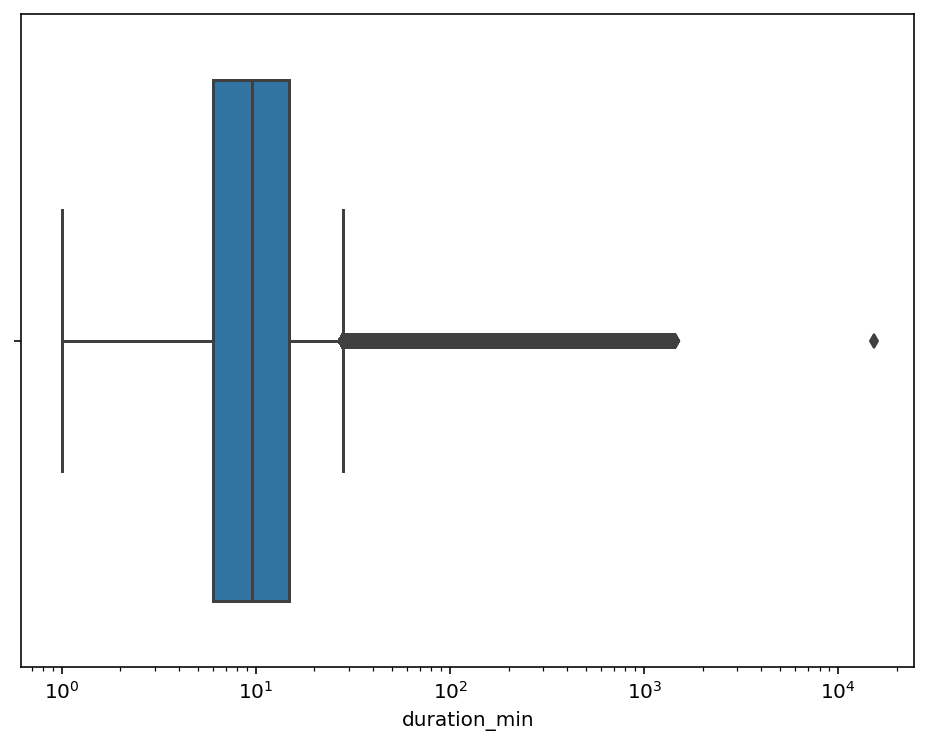

In [40]:
f, ax = plt.subplots(figsize=(8, 6))
ax.set_xscale("log")
sns.boxplot(goBike_clean['duration_min']);

There are clearly outliers in the data lets look at a histrogram plotting till 100 minutes

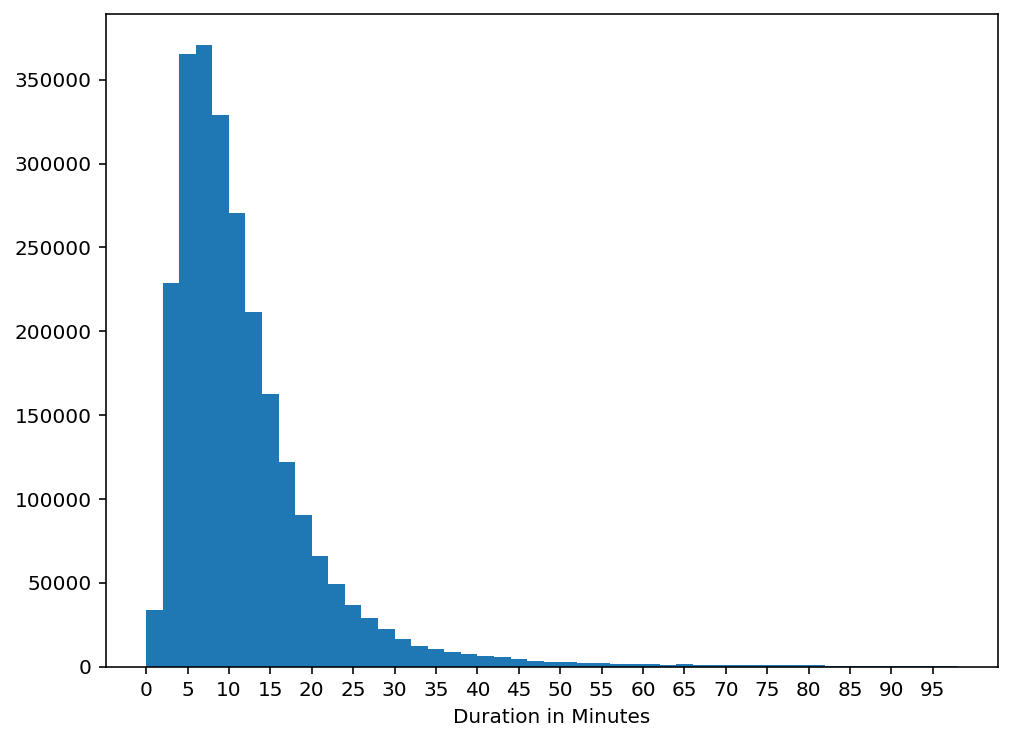

In [41]:
plt.subplots(figsize=(8,6))
bins = np.arange(0, 100, 2)
ticks = np.arange(0, 100, 5)
plt.hist(goBike_clean['duration_min'], bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Duration in Minutes');

In [42]:
print(f'mean : {goBike_clean["duration_min"].mean()}')
print(f'mode : {goBike_clean["duration_min"].mode().values}')

mean : 13.46080549808303
mode : [5.65]


The data is highly skewed to the right with a mean of 13.56 and a mode of 5.65. To fairly compare duration time between different user types we need to drop outliers. Let's use the describe function and add the 99TH percentile.

In [43]:
goBike_clean['duration_min'].describe(percentiles=[.99])

count    2.506983e+06
mean     1.346081e+01
std      3.291190e+01
min      1.000000e+00
50%      9.516667e+00
99%      6.876667e+01
max      1.520183e+04
Name: duration_min, dtype: float64

In the nest step I will filter out duration times higher than 68 minutes, since 99% of duration time is lower than 68 minutes

In [44]:
# drop duration time<=68
goBike_clean = goBike_clean.query('duration_min <= 68')

##### Test:

In [45]:
goBike_clean.query('duration_min > 68')
# this should be empty

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_time_month,start_time_day,start_time_hour,start_time_mdy,duration_min


#### Save the cleaned dataset for better access without performing each cleaning step again when reopening notebook

In [46]:
# again I saved the cleand dataframe
# goBike_clean.to_csv('FordGoBike_2019/Ford_Go_Bike_2019_clean.csv', index=None)

<a id='visual'></a>
### Visualizations
In this section I will finally visualize the data and make plots to answer the following questions, which will be answered in the next section:
1. When are most trips taken in terms of time of day, day of the week, or month of the year?
2. How long does the average trip take?
3. Does the above depend on if a user is a subscriber or customer?

Each visualization will be followed by a interpretation which summarizes the main points.

In [47]:
# load the cleaned dataset
# goBike_clean = pd.read_csv('FordGoBike_2019/Ford_Go_Bike_2019_clean.csv')
# make some adjustments that aren't saved in the clean DataFrame
# goBike['start_time_day'] = pd.Categorical(goBike['start_time_day'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered = True)
# goBike['start_time_month'] = pd.Categorical(goBike['start_time_month'], categories = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'November', 'December'], ordered = True)

In [71]:
#set base color
b_color = sns.color_palette()[0]
# set seaborn style for uniform 
sns.set_style("dark")

#### First I will look at the number and duration of trips plotted for the year 2019

In [48]:
# create the different values for the yearly plot
dates = goBike_clean.groupby(by=goBike_clean['start_time_mdy'])['bike_id'].count().index.values
val_counts = goBike_clean.groupby(by=goBike_clean['start_time_mdy'])['bike_id'].count().values
duration_min_sum = goBike_clean.groupby(by=goBike_clean['start_time_mdy'])['duration_min'].sum().values

In [49]:
# create dict for dataframe
d = {'dates': dates, 'ride_counts': val_counts, 'duration_min': duration_min_sum}
# create dataframe
annual_counts = pd.DataFrame(data=d)
# transform dates to datetime
annual_counts['dates'] = pd.to_datetime(annual_counts['dates'])
# set dates as index
annual_counts.set_index('dates', inplace = True)

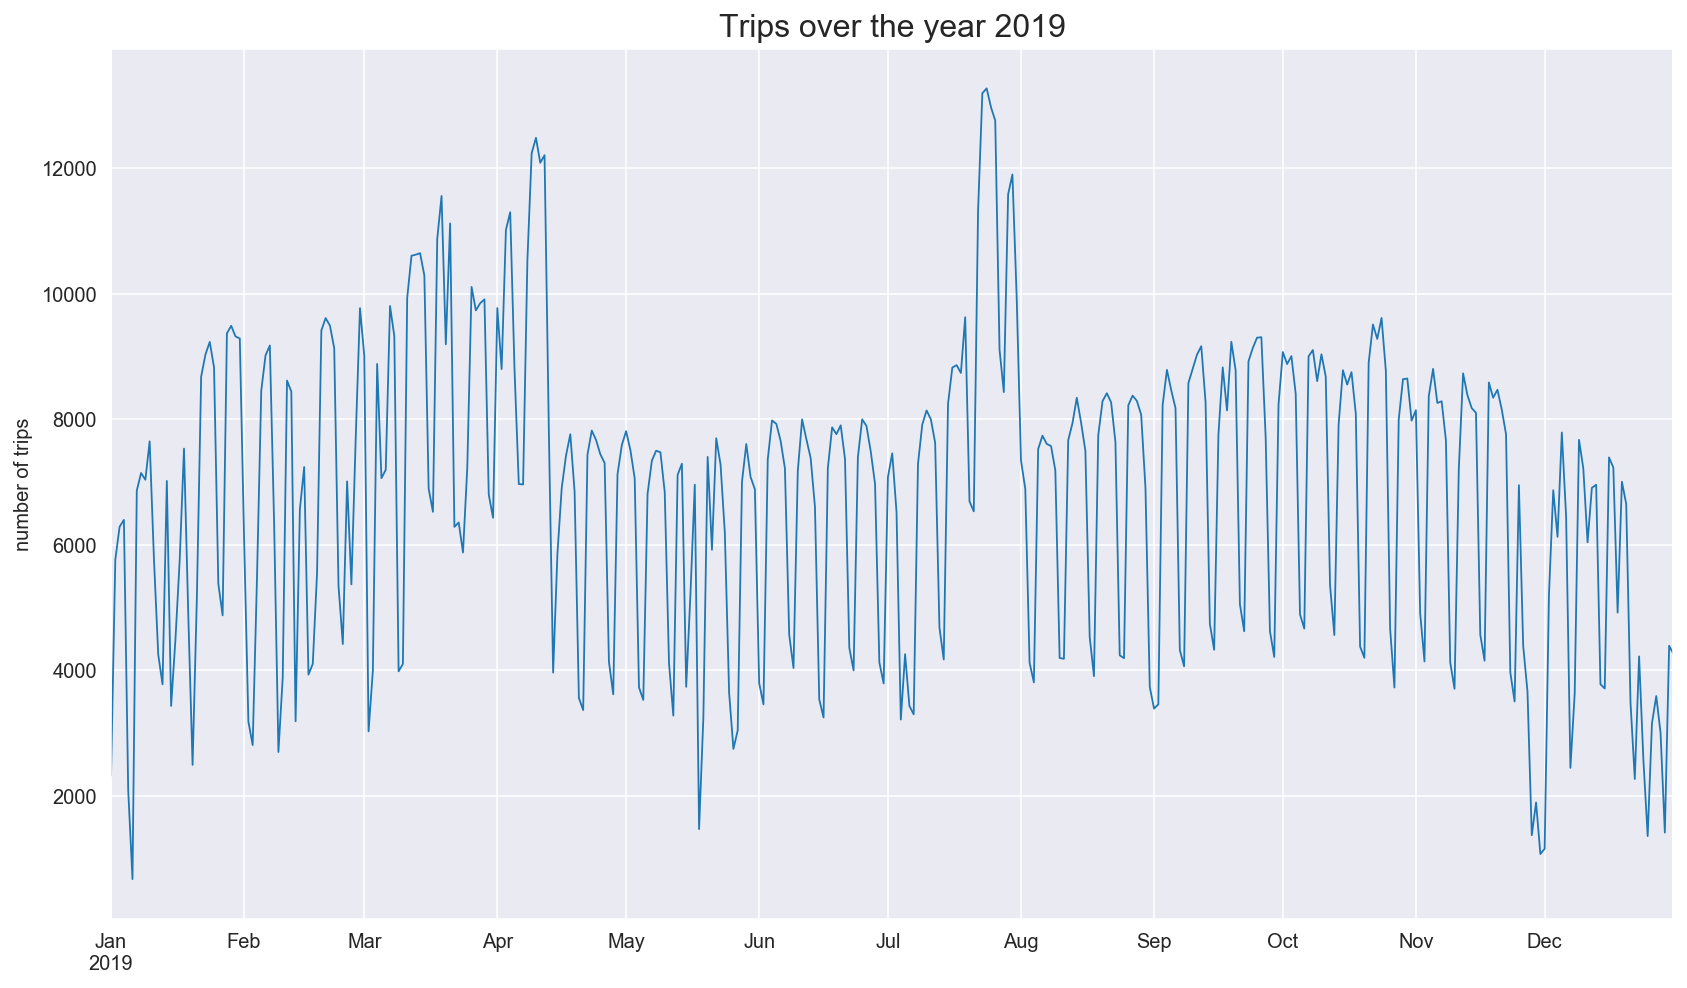

In [50]:
# plot number of trip taken in 2019
fig = plt.subplots(figsize=(14,8))
with sns.axes_style("darkgrid"):
    annual_counts['ride_counts'].plot(linewidth=.9)
plt.title('Trips over the year 2019', fontsize = 16)
plt.xlabel('')
plt.ylabel('number of trips');

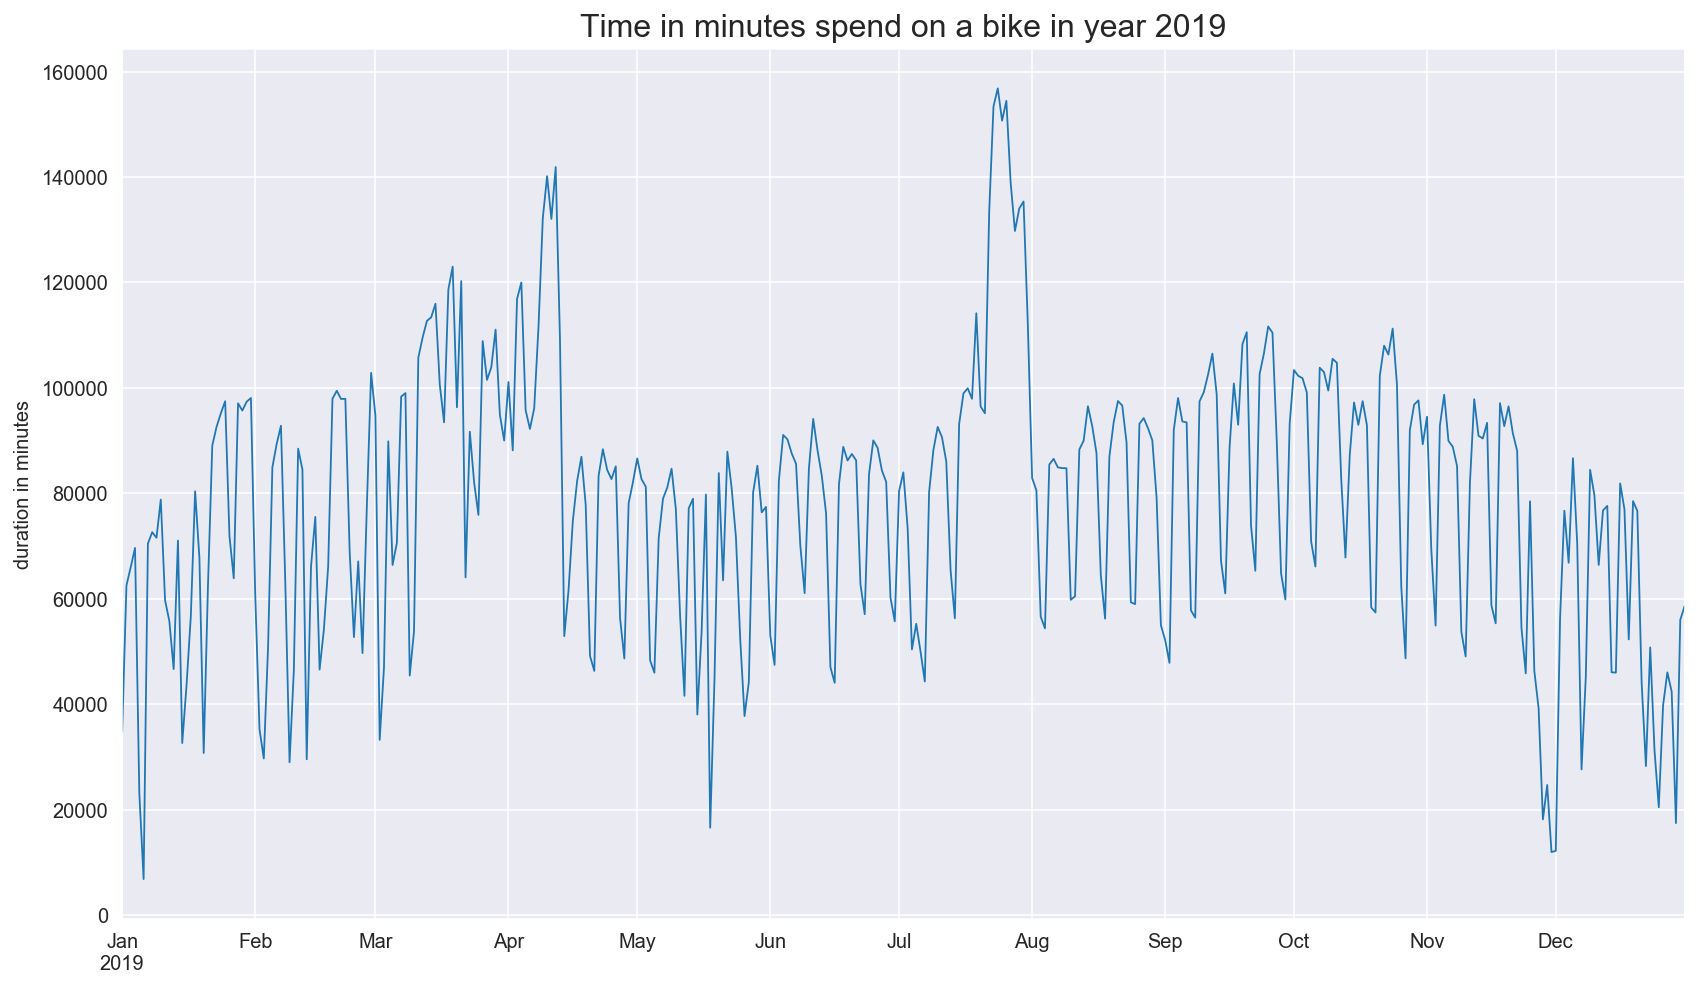

In [51]:
# plot duration of trips taken in 2019
fig = plt.subplots(figsize=(14,8))
with sns.axes_style("darkgrid"):
    annual_counts['duration_min'].plot(linewidth=.9)
plt.title('Time in minutes spend on a bike in year 2019', fontsize = 16)
plt.xlabel('')
plt.ylabel('duration in minutes');

In [52]:
annual_counts['ride_counts'].corr(annual_counts['duration_min'])
# as expected a high correlation between ride counts and sum of duration

0.9636280809518315

#### Interpretation
- there is the same volatility pattern in every month, indicating differences between weekdays and weekends. This will become obvious when I will look at the day of the week later in this analysis
- raising trend till April
- highest spike in mid-July
- high correlation between total trips and duration time

#### Now lets look at number of trips per month and compare user types

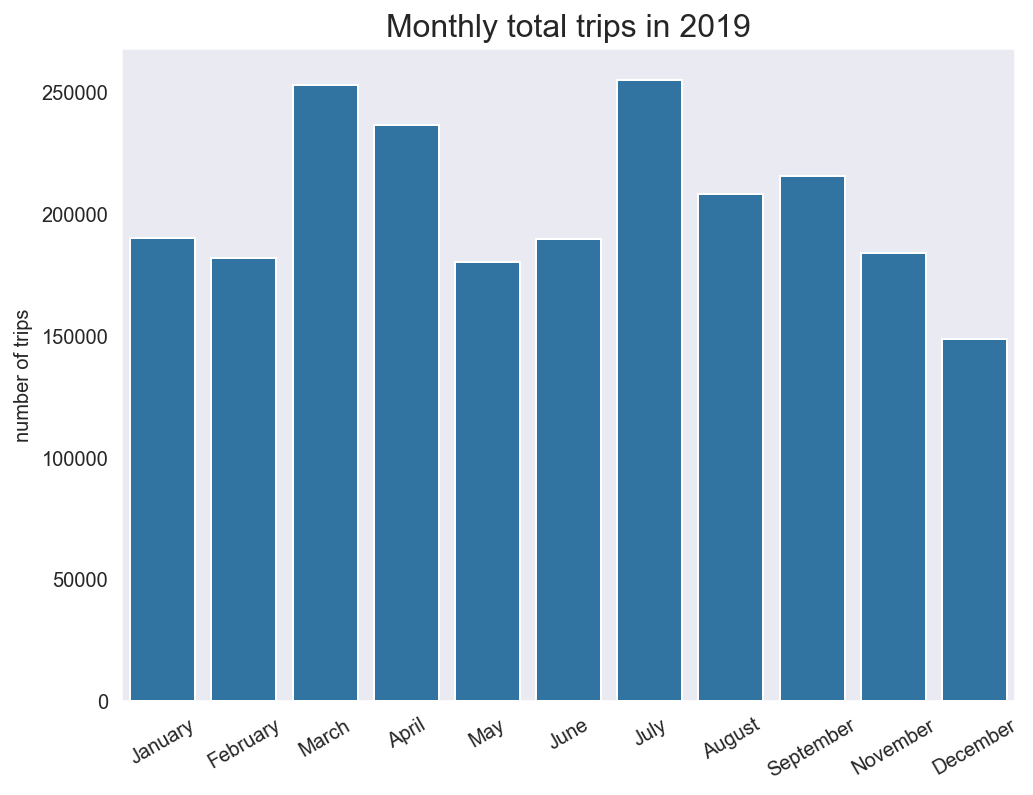

In [53]:
# plot trips taken per month
fig = plt.subplots(figsize=(8,6))
sns.countplot(goBike_clean['start_time_month'], color = b_color)
plt.xticks(rotation= 30)
plt.title('Monthly total trips in 2019', fontsize = 16)
plt.xlabel('')
plt.ylabel('number of trips');

#### Interpretation
- most usage in March, April and July 
- surprisingly low usage in May and June, which have almost the same number of trips as in January and February
- as expected lowest usage in December
- in the following analysis I will add user type to the analysis to get insight about different user patterns

#### First plot the number of trips per user type

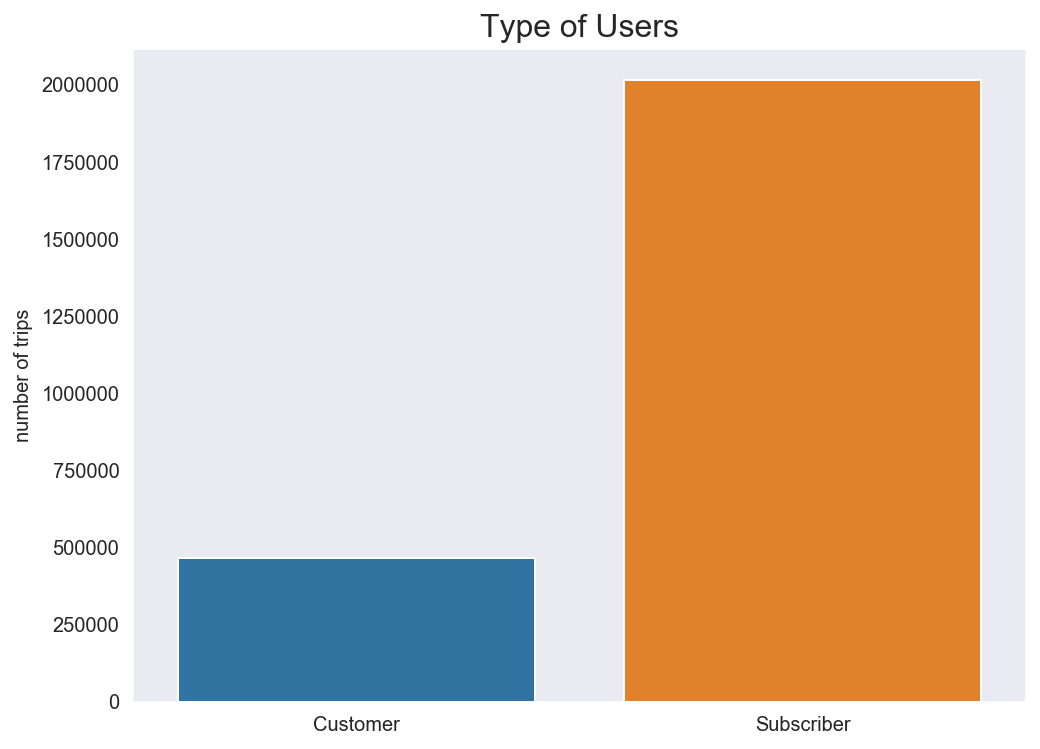

In [54]:
fig = plt.subplots(figsize=(8,6))
sns.countplot(goBike_clean['user_type'])
plt.title('Type of Users', fontsize = 16)
plt.xlabel('')
plt.ylabel('number of trips');

#### Conclusion:
When people use the bikes they are mostly subscribed, this could be interesting when we look at user patterns per month, day and hour

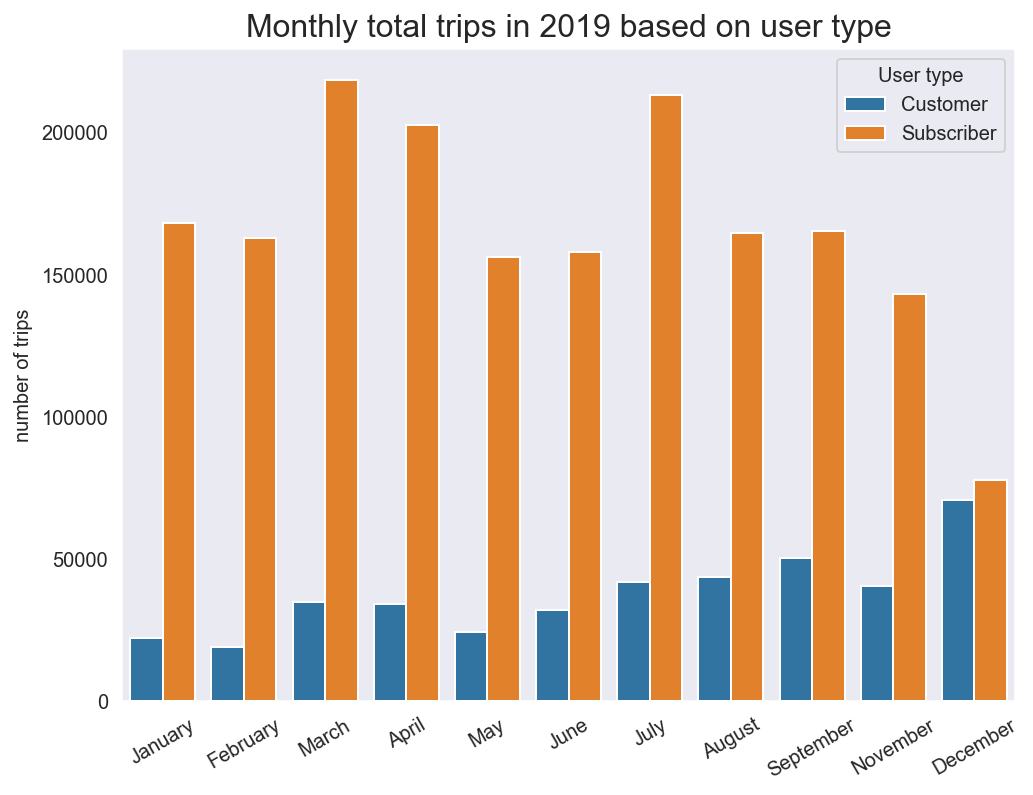

In [55]:
fig = plt.subplots(figsize=(8,6))
sns.countplot(goBike_clean['start_time_month'], hue=goBike_clean['user_type'])
plt.xticks(rotation= 30)
plt.legend(title = 'User type')
plt.title('Monthly total trips in 2019 based on user type', fontsize = 16)
plt.xlabel('')
plt.ylabel('number of trips');

#### Interpretation:
- it seems that the frequency of Customers using the service is increasing till the end of the year, this could mean that the service is getting more recognized and therefore used 
- interesting is also that there is almost the same number of trips in December for customers and subscribers

#### Now that we looked at month, we will do the same for day of the week

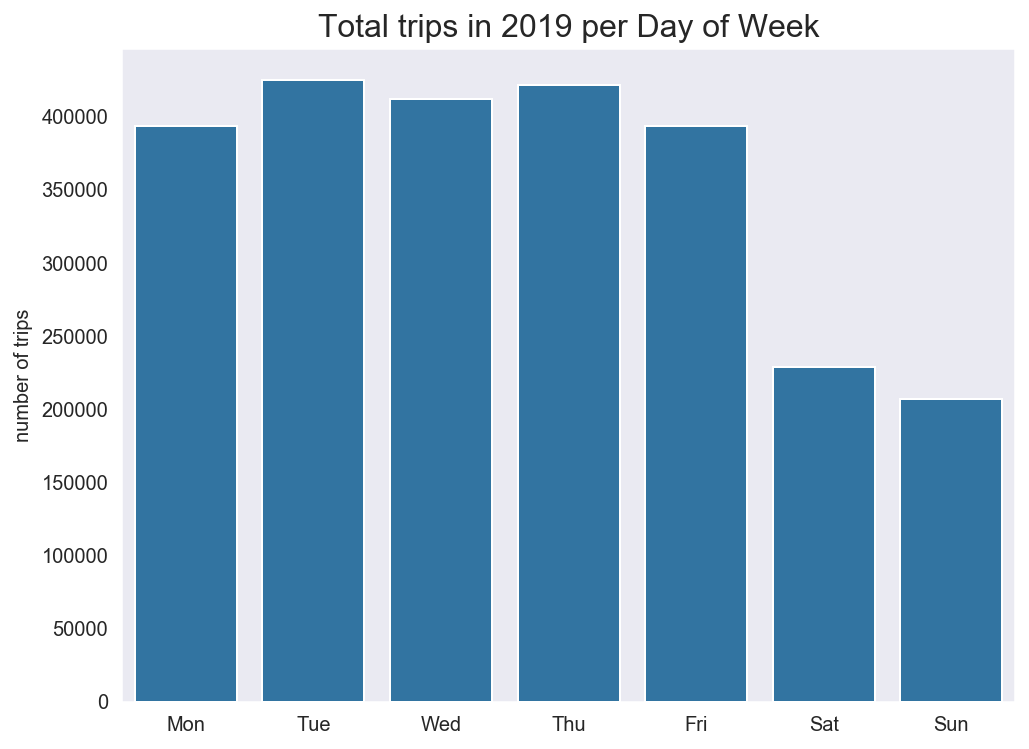

In [56]:
fig = plt.subplots(figsize=(8,6))
sns.countplot(goBike_clean['start_time_day'], color = b_color)
plt.title('Total trips in 2019 per Day of Week', fontsize = 16)
plt.xlabel('')
plt.ylabel('number of trips');

#### Interpretation:
- The usage is almost the same on weekdays and than it drops considerably (-50%) on weekends
- This could be due to difference user patterns. In the next plot I will add user type to the visualization

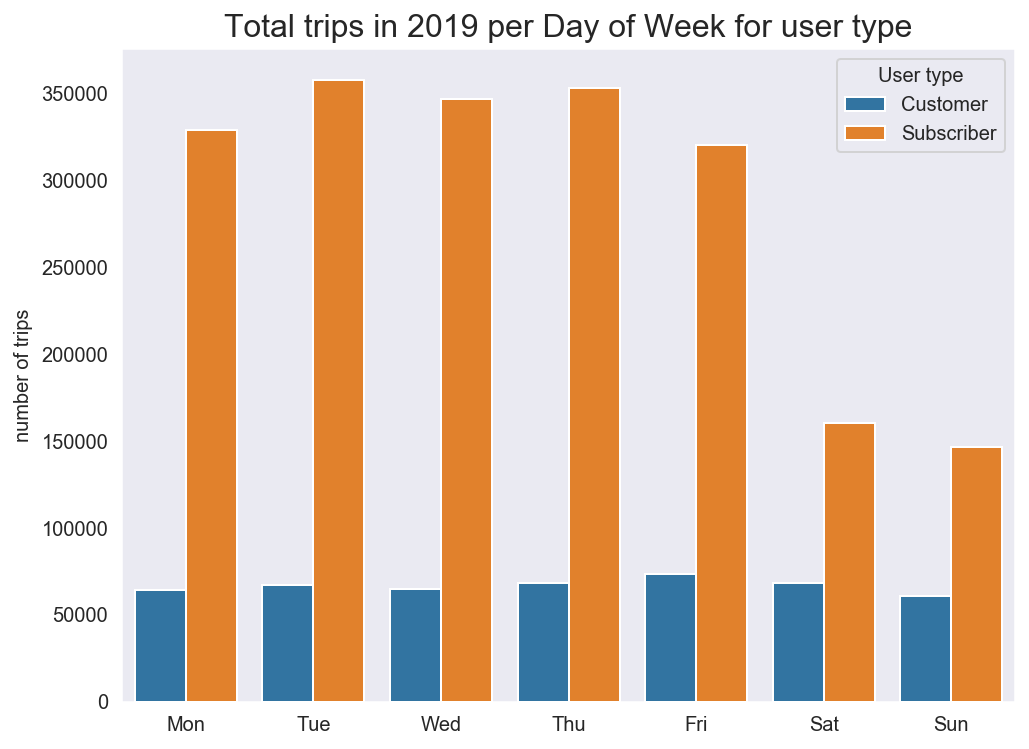

In [57]:
fig = plt.subplots(figsize=(8,6))
sns.countplot(goBike_clean['start_time_day'], hue = goBike_clean['user_type'])
plt.legend(title = 'User type')
plt.title('Total trips in 2019 per Day of Week for user type', fontsize = 16)
plt.xlabel('')
plt.ylabel('number of trips');

#### Interpretation:
- The usage for customers stays the same on weekends, usage from subscribers drops on weekends. This is most likely due the instance that subscribers use the service for work whereas customers use it without a specific reason.

#### Lets look at the hour of the day to dive deeper into the different user patterns

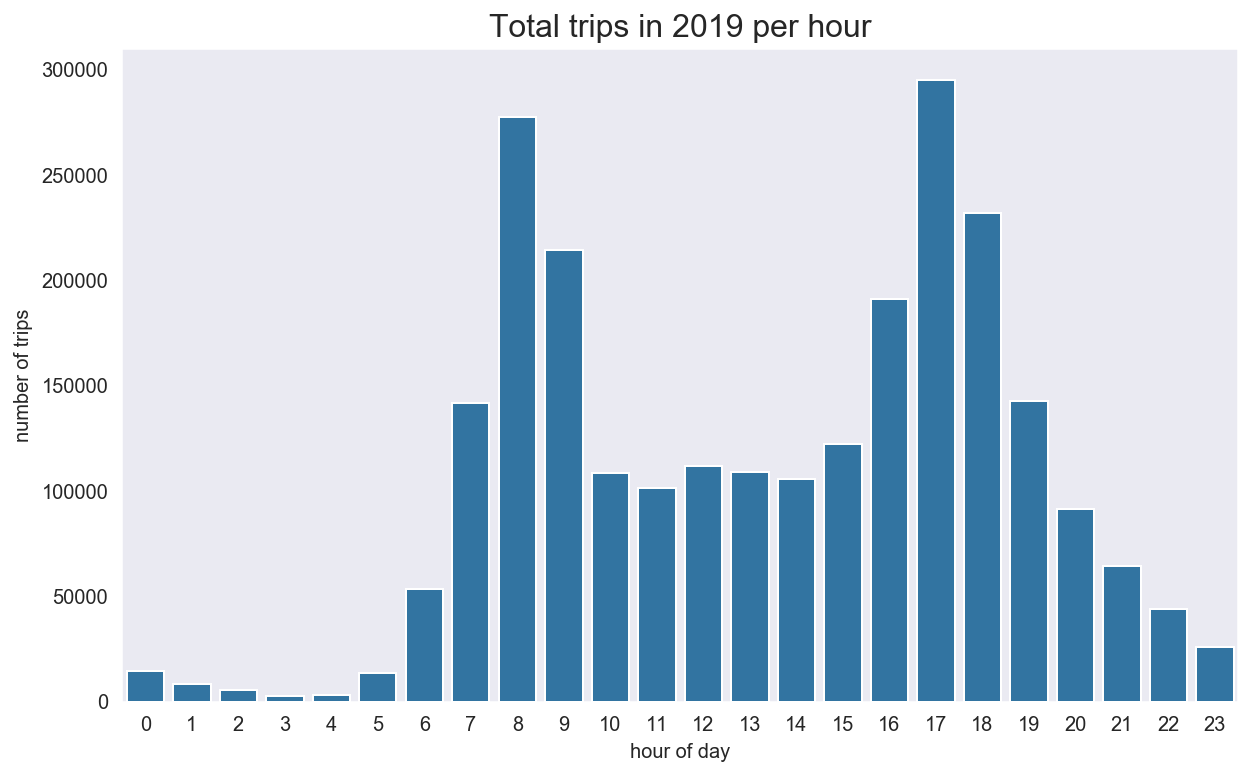

In [58]:
fig = plt.subplots(figsize=(10,6))
sns.countplot(goBike_clean['start_time_hour'], color = b_color)
plt.title('Total trips in 2019 per hour', fontsize = 16)
plt.xlabel('hour of day')
plt.ylabel('number of trips');

#### Interpretation
- the service gets mostly used for commuting: spikes around 8 am and 5 pm 
- this supports my conclusion that the service is used mostly to commute 
- the next chart will include user type

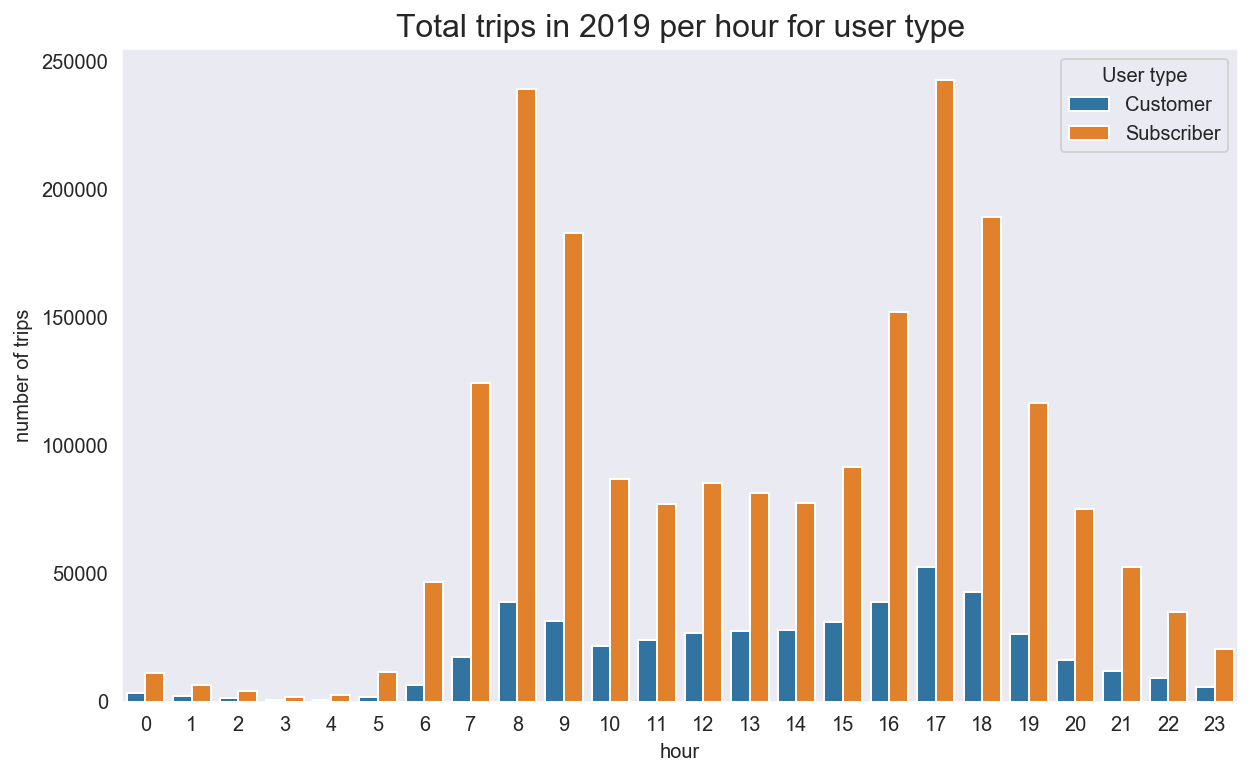

In [59]:
fig = plt.subplots(figsize=(10,6))
sns.countplot(goBike_clean['start_time_hour'], hue = goBike_clean['user_type'])
plt.legend(title = 'User type')
plt.title('Total trips in 2019 per hour for user type', fontsize = 16)
plt.xlabel('hour')
plt.ylabel('number of trips');

#### Interpretation
- as mentioned, people who are subscribed to the service use it mainly for commuting
- people who aren't subscribed are also using it for commuting (same spike patten), but not in the same frequency. They use the service more in between 11 a.m. and 5 p.m. relative to subscribers

#### To dive even deeper, lets create a heatmap with the number od trips plotted agains the hour of the day

In [60]:
# get the count of bikes for each hour and each day of the week
goBike_customers = goBike_clean.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_day'])['bike_id'].count().reset_index()
goBike_subscribers = goBike_clean.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_day'])['bike_id'].count().reset_index()

In [61]:
# make pivots to make the data usable for a heatmap
goBike_customers = goBike_customers.pivot('start_time_hour', 'start_time_day', 'bike_id')
goBike_subscribers = goBike_subscribers.pivot('start_time_hour', 'start_time_day', 'bike_id')

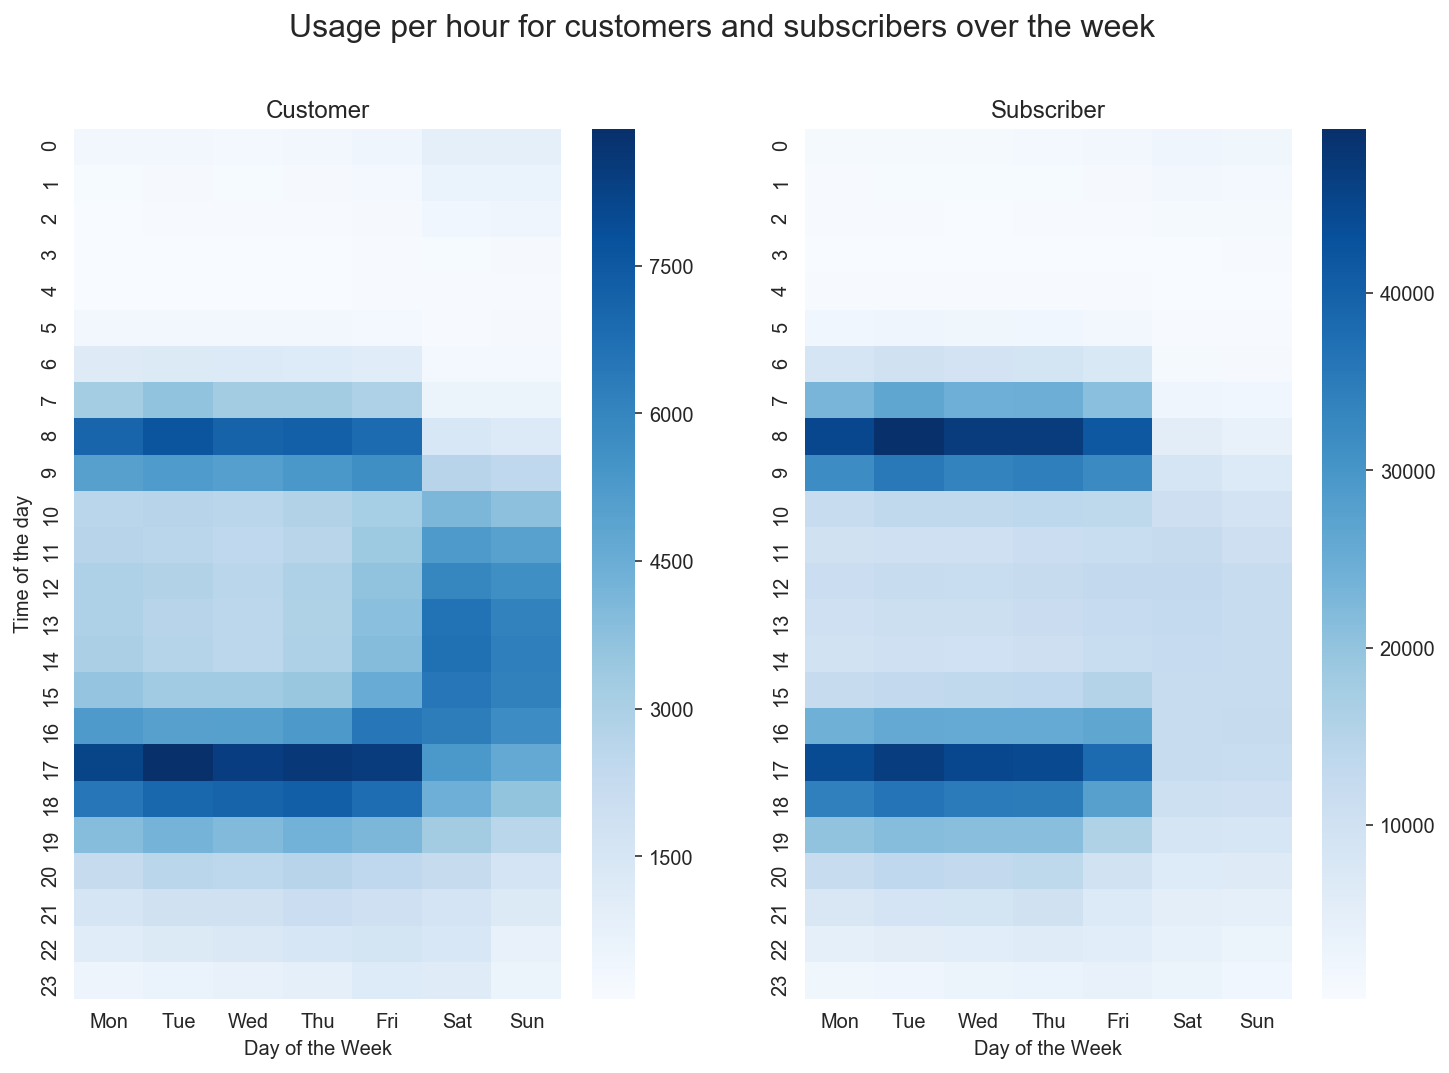

In [62]:
# set up subplots
plt.subplots(figsize=(12, 8))
plt.suptitle('Usage per hour for customers and subscribers over the week', fontsize = 16)

# plot heatmap
plt.subplot(121)
sns.heatmap(goBike_customers, cmap = 'Blues')
plt.title('Customer')
plt.xlabel('Day of the Week')
plt.ylabel('Time of the day')

# plot heatmap
plt.subplot(122)
sns.heatmap(goBike_subscribers, cmap = 'Blues')
plt.title('Subscriber')
plt.xlabel('Day of the Week')
plt.ylabel('');

#### Interpretation
- the heatmap shows clearly the different use patterns for customers and subscribers. Customer use the service also on weekends whereas subscriber don't use it as much on weekends
- keep in mind that there are a lot of subscribed people who use the service on weekends but not as much as on workdays.
- on weekends the service mainly gets used around 11 a.m. to 4 p.m.
- on weekday the service mainly gets used at around 8 a.m. and 5 p.m.

#### Now that we analyzed number of trips, lets look at the duration of trips related to user type

In [69]:
# calculate the means for the different user types
customer_duration_mean = goBike_clean.query('user_type == "Customer"')['duration_min'].mean()
subscriber_duration_mean = goBike_clean.query('user_type == "Subscriber"')['duration_min'].mean()
average_duration = goBike_clean['duration_min'].mean()

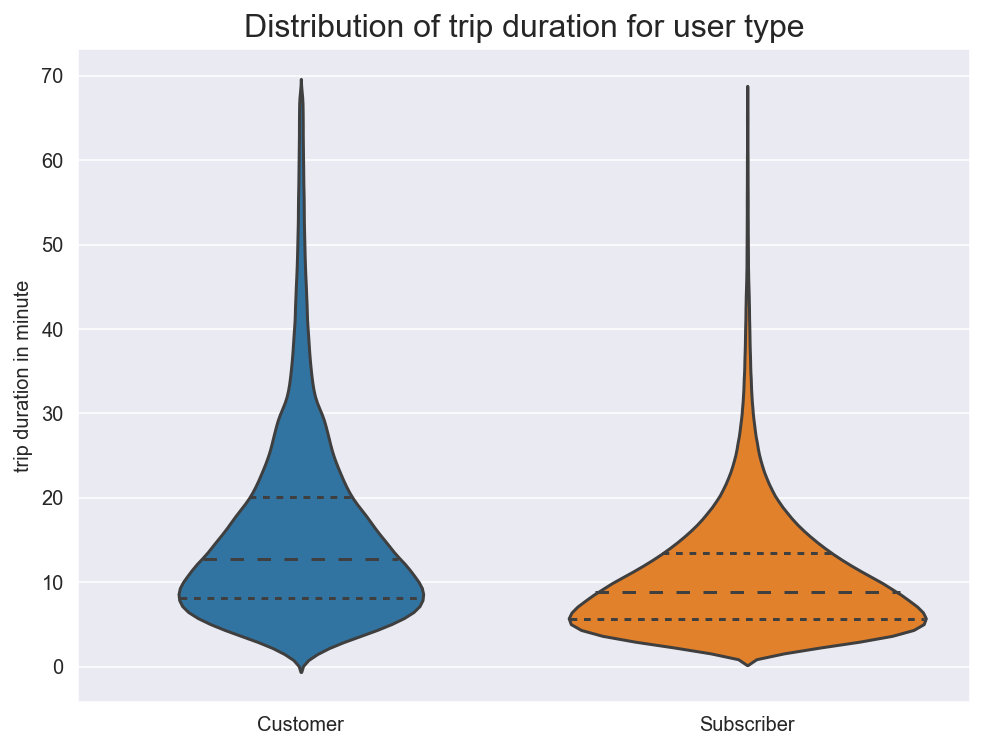

In [64]:
fig = plt.subplots(figsize=(8,6))
sns.violinplot(x='user_type', y='duration_min', data = goBike_clean, inner = 'quartile')
plt.gca().yaxis.grid(True) # set grid lines to enhance interpretability
plt.xlabel('')
plt.ylabel('trip duration in minute')
plt.title('Distribution of trip duration for user type', fontsize = 16);

In [70]:
print(f'Customer average duration time: {customer_duration_mean}')
print(f'Subscriber average duration time: {subscriber_duration_mean}')
print(f'Total average duration time: {average_duration}')

Customer average duration time: 15.75112193662746
Subscriber average duration time: 10.587413549621356
Total average duration time: 11.558980946708788


#### Interpretation
- customers have a greater range on their rides and they spend on average 5 minutes more on the bike 
- this violin plot also supports the interpretation that subscribers are using the service for commuting, since the plot is more 'dense' (flat and wide) in the area around 5 to 10 minutes
- this could mean that they drive a fixed route on each day of the workweek

#### Now lets look at the duration time per day of week and compare user type

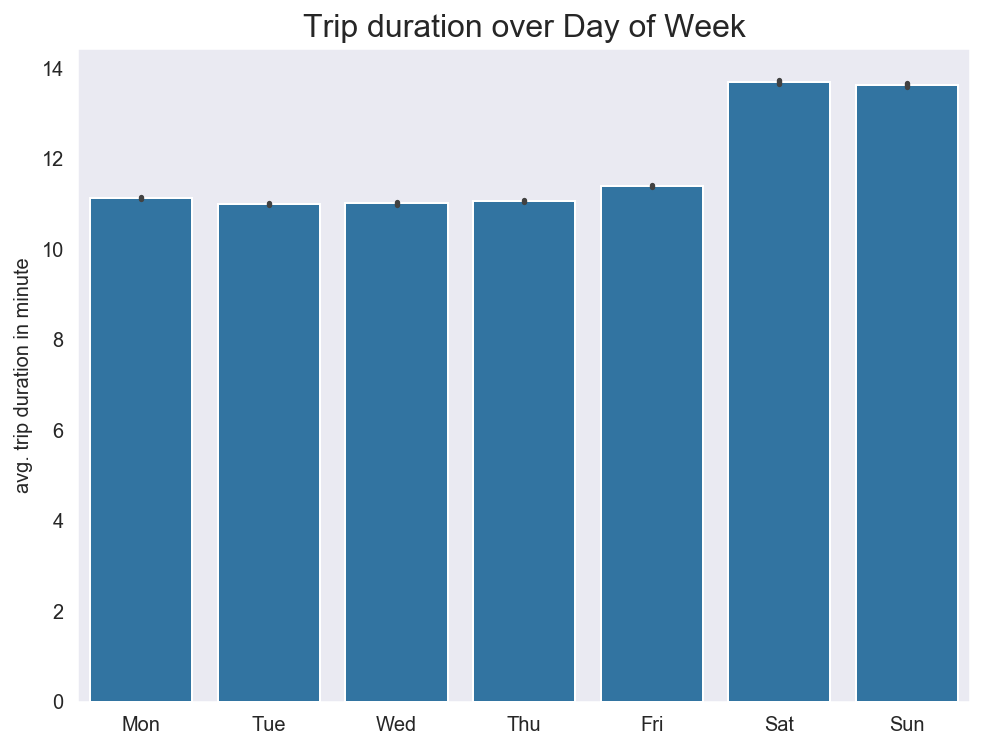

In [66]:
fig = plt.subplots(figsize=(8,6))
sns.barplot(x = 'start_time_day', y = 'duration_min', data = goBike_clean, color = b_color)
plt.xlabel('')
plt.ylabel('avg. trip duration in minute')
plt.title('Trip duration over Day of Week', fontsize = 16);

#### Interpretation
- as expected the trips are shorter on weekdays than on weekends -> fixed route to work / flexible route and therefor longer route on weekends
- stable usage on workdays 

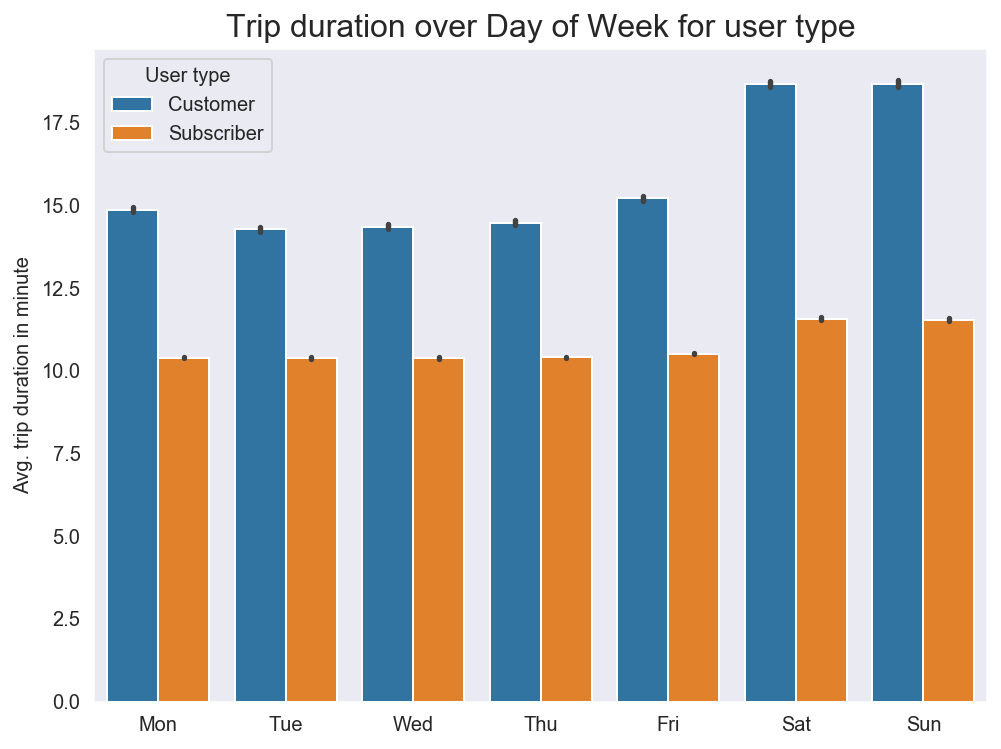

In [68]:
fig = plt.subplots(figsize=(8,6))
sns.barplot(x = 'start_time_day', y = 'duration_min', hue = 'user_type', data = goBike_clean)
plt.xlabel('')
plt.ylabel('Avg. trip duration in minute')
plt.title('Trip duration over Day of Week for user type', fontsize = 16)
plt.legend(title = 'User type');

#### Interpretation
- This chart clearly shows the different durations related to user type. And it shows that customers use the bike for a longer period over each weekday but especially at the weekend

<a id='answers'></a>
## Answers

1. When are most trips taken in terms of time of day, day of the week, or month of the year?
    - hour: Mon-Fri at 8 a.m. and 5 p.m. / Sat-Sun between 10 a.m. and 5 p.m.
    - day: most trips on Mon-Fri, than its drops almost 50% on weekends
    - month: March, April and July
2. How long does the average trip take?
    - the average trip takes around 12 minutes 
    - the average duration time is higher on weekends than on workdays
3. Does the above depend on if a user is a subscriber or customer?
    - user type is a relevant variable when looking at usage patterns
    - customers drive on average longer (16 min) than subscribers (11 min)
    - subscriber use the service mostly on workdays for commuting
    - customers are also use is for commuting (same spikes in the data per hour) but also on weekends in the same amount compared to subscribers which use it, but not as much as on workdays

<a id='resources'></a>
## Resources
- https://en.wikipedia.org/wiki/Bay_Wheels
- https://stackoverflow.com/questions/16074392/getting-vertical-gridlines-to-appear-in-line-plot-in-matplotlib
- https://stackoverflow.com/questions/58274401/importing-multiple-csv-files-into-pandas-and-merge-them-into-one-dataframe
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html